# Bike share dataset
Liga con la descripción de los datos:
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [63]:
import requests
from zipfile import ZipFile
import os.path
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [64]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
req = requests.get(url)
file_name = "Bike-Sharing-Dataset.zip"

if not os.path.isfile("./" + file_name):
    with open(file_name, "wb") as my_file:
        my_file.write(req.content)

    with ZipFile(file_name) as my_zip:
        my_zip.printdir()
        my_zip.extractall()

In [65]:
bikes_day = pd.read_csv("day.csv", index_col=0)
bikes_hour = pd.read_csv("hour.csv", index_col=0)

print("Dimensiones del dataset bikes_day:", bikes_day.shape)
bikes_day.head()

Dimensiones del dataset bikes_day: (731, 15)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Text(0.5, 0, 'Condición climática')

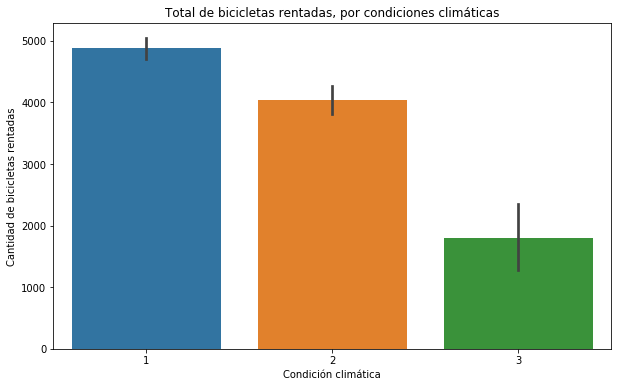

In [66]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por condiciones climáticas')
sns.barplot(x=bikes_day['weathersit'], y=bikes_day['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas')
plt.xlabel('Condición climática')

Text(0.5, 0, 'Estación del año')

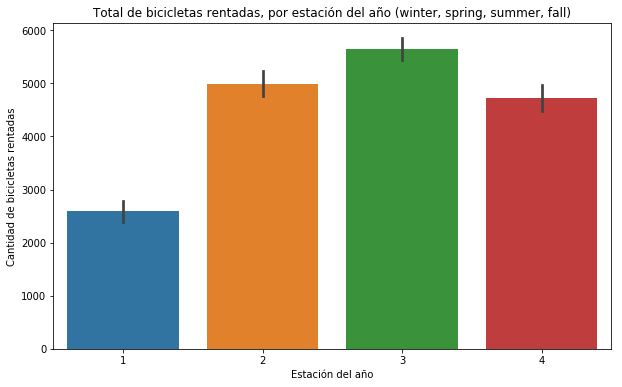

In [67]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por estación del año (winter, spring, summer, fall)')
sns.barplot(x=bikes_day['season'], y=bikes_day['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas')
plt.xlabel('Estación del año')

Text(0.5, 0, 'Mes del año')

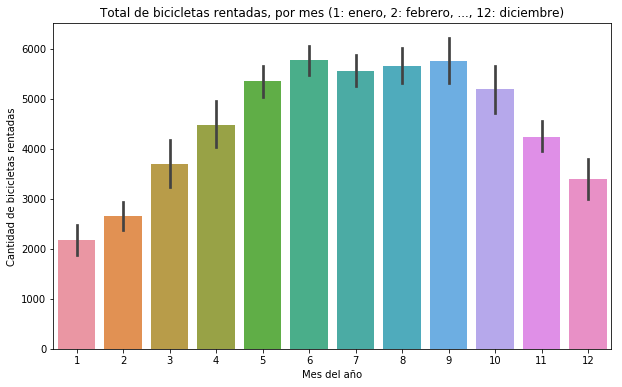

In [68]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por mes (1: enero, 2: febrero, ..., 12: diciembre)')
sns.barplot(x=bikes_day['mnth'], y=bikes_day['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas')
plt.xlabel('Mes del año')

Text(0.5, 0, 'Día de la semana')

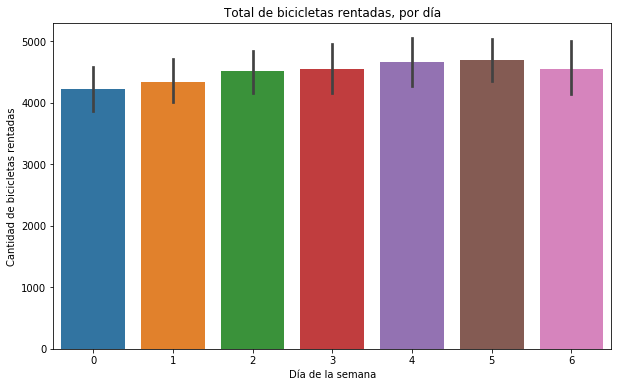

In [69]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por día')
sns.barplot(x=bikes_day['weekday'], y=bikes_day['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas')
plt.xlabel('Día de la semana')

Text(0.5, 0, 'Temperatura')

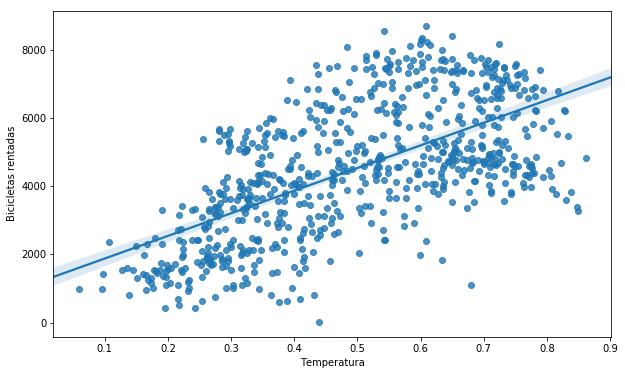

In [70]:
plt.figure(figsize=(10,6))
sns.regplot(x=bikes_day['temp'], y=bikes_day['cnt'])
plt.ylabel('Bicicletas rentadas')
plt.xlabel('Temperatura')

Text(0.5, 0, 'Humedad')

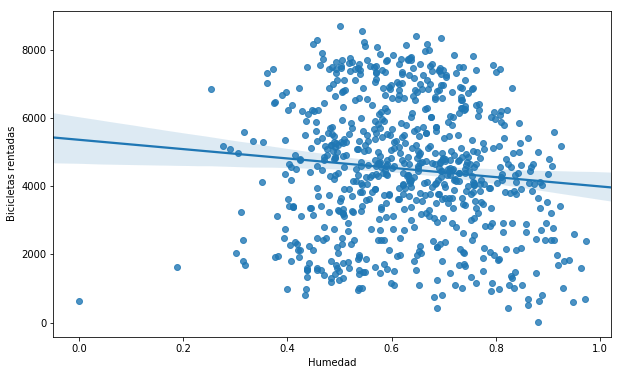

In [71]:
plt.figure(figsize=(10,6))
sns.regplot(x=bikes_day['hum'], y=bikes_day['cnt'])
plt.ylabel('Bicicletas rentadas')
plt.xlabel('Humedad')

Text(0.5, 0, 'Velocidad del viento')

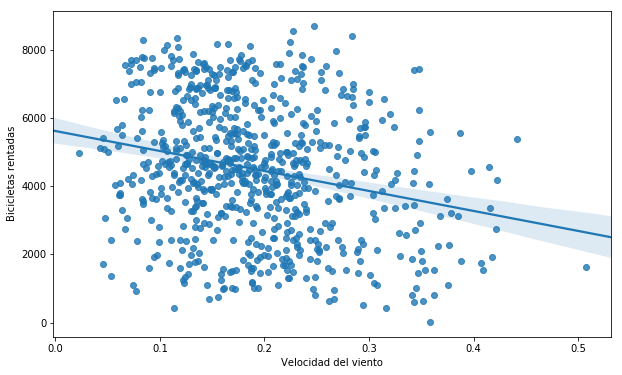

In [72]:
plt.figure(figsize=(10,6))
sns.regplot(x=bikes_day['windspeed'], y=bikes_day['cnt'])
plt.ylabel('Bicicletas rentadas')
plt.xlabel('Velocidad del viento')

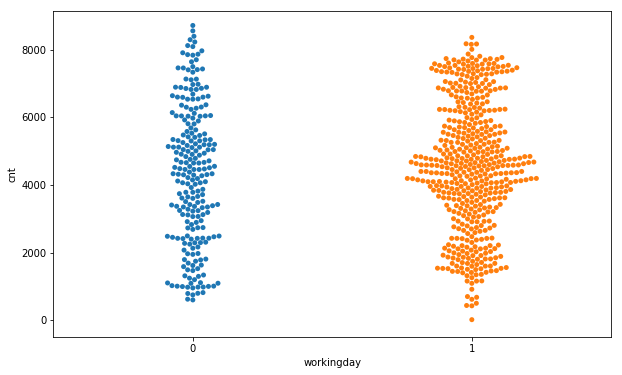

In [73]:
plt.figure(figsize=(10,6))
sns.swarmplot(x=bikes_day['workingday'], y=bikes_day['cnt'])
plt.ylabel('Bicicletas rentadas')
plt.xlabel('Día de trabajo?')

In [74]:
print("Dimensiones del dataset bikes_hour:", bikes_hour.shape)
bikes_hour.head()

Dimensiones del dataset bikes_hour: (17379, 16)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Text(0.5, 0, 'Hora del día')

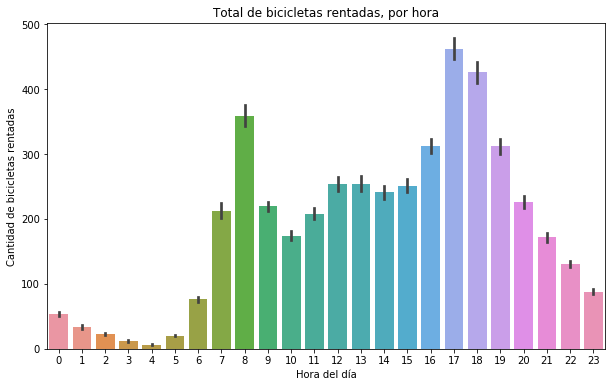

In [75]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por hora')
sns.barplot(x=bikes_hour['hr'], y=bikes_hour['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas')
plt.xlabel('Hora del día')